# LR3

In [1]:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/a2/1d/1a35edd6943f27ff4b5e2d6ba634e7d1bac2e6f815f8efae0666ac71a68d/yfinance-0.2.46-py2.py3-none-any.whl.metadata
  Using cached yfinance-0.2.46-py2.py3-none-any.whl.metadata (13 kB)
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/04/13/d9839089b900fa7b479cce495d62110cddc4bd5630a04d8469916c0e79c5/frozendict-2.4.6-py311-none-any.whl.metadata
  Using cached frozendict-2.4.6-py311-none-any.whl.metadata (23 kB)
  Using cached peewee-3.17.7.tar.gz (939 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting

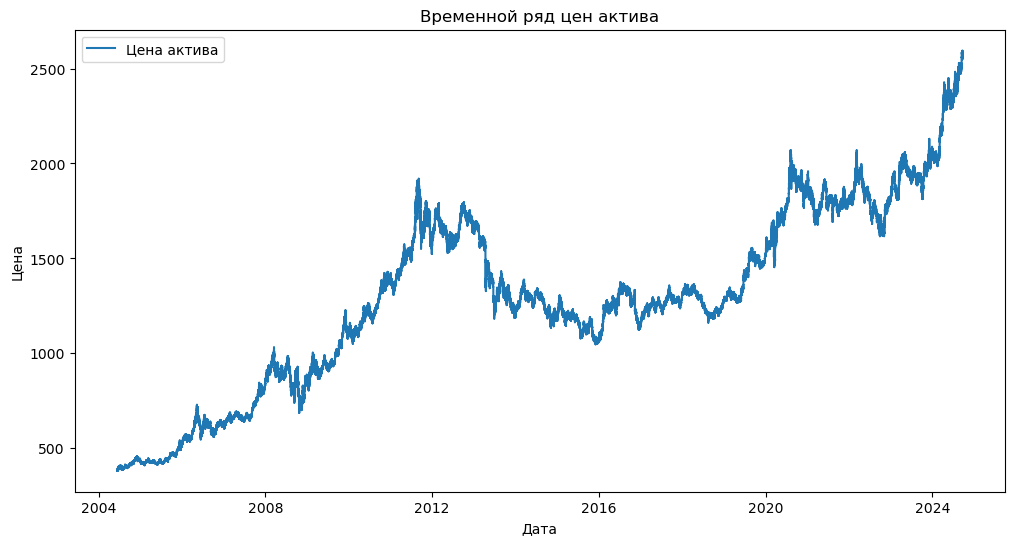

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import yfinance as yf

# 1. Загрузка данных
data = pd.read_csv('XAU_15m_data_2004_to_2024-20-09.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 2. Построение графика
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Цена актива')
plt.title('Временной ряд цен актива')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

In [2]:
# 3. Подготовка данных
def create_features(data, look_back=60):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

scaler = MinMaxScaler()
aapl_scaled = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

X, y = create_features(aapl_scaled)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Проверка формата входных данных
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (371741, 60, 1), y_train shape: (371741, 1)
X_test shape: (92936, 60, 1), y_test shape: (92936, 1)


In [ ]:
# 4. Обучение моделей машинного обучения

# 4.1 Машина опорных векторов (SVM)
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train.reshape(-1, X_train.shape[1]), y_train.ravel())  # Убедитесь, что данные имеют правильную форму

# 4.2 Случайный лес с настройкой гиперпараметров
rf_model = RandomForestRegressor(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5)
rf_grid_search.fit(X_train.reshape(-1, X_train.shape[1]), y_train.ravel())
rf_model = rf_grid_search.best_estimator_

# 4.3 XGBoost с настройкой гиперпараметров
xgb_model = XGBRegressor(random_state=42)
xgb_param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.01, 0.1],
}
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train.reshape(-1, X_train.shape[1]), y_train.ravel())
xgb_model = xgb_grid_search.best_estimator_

In [ ]:
# Машина опорных векторов (SVM)
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train.ravel())

In [ ]:
# Random Forest с настройкой гиперпараметров
rf_model = RandomForestRegressor(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train.ravel())
rf_model = rf_grid_search.best_estimator_

In [ ]:
# XGBoost с настройкой гиперпараметров
xgb_model = XGBRegressor(random_state=42)
xgb_param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.01, 0.1],
}
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train, y_train.ravel())
xgb_model = xgb_grid_search.best_estimator_

In [ ]:
# Оценка моделей
def evaluate_model(model, X_test, y_test, model_name):
    if model_name == 'Logistic Regression':
        # Для логистической регрессии прогнозируем направление движения
        y_pred_direction = model.predict(X_test)
        y_pred = np.where(y_pred_direction == 1, y_test + 0.01, y_test - 0.01)
    else:
        y_pred = model.predict(X_test).reshape(-1)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f'{model_name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}')
    return y_pred

lr_pred = evaluate_model(lr_model, X_test[1:], y_test[1:], 'Logistic Regression')
svm_pred = evaluate_model(svm_model, X_test, y_test.ravel(), 'SVM')
rf_pred = evaluate_model(rf_model, X_test, y_test.ravel(), 'Random Forest')
xgb_pred = evaluate_model(xgb_model, X_test, y_test.ravel(), 'XGBoost')

In [ ]:
# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(aapl.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.plot(aapl.index[-len(y_test):], scaler.inverse_transform(lr_pred.reshape(-1, 1)), label='Logistic Regression')
plt.plot(aapl.index[-len(y_test):], scaler.inverse_transform(svm_pred.reshape(-1, 1)), label='SVM')
plt.plot(aapl.index[-len(y_test):], scaler.inverse_transform(rf_pred.reshape(-1, 1)), label='Random Forest')
plt.plot(aapl.index[-len(y_test):], scaler.inverse_transform(xgb_pred.reshape(-1, 1)), label='XGBoost')
plt.title('Сравнение прогнозов моделей машинного обучения')
plt.xlabel('Дата')
plt.ylabel('Цена акции')
plt.legend()
plt.show()

In [ ]:
# Анализ важности признаков (для Random Forest и XGBoost)
if hasattr(rf_model, 'feature_importances_'):
    feature_importance_rf = pd.DataFrame({'feature': range(X_train.shape), 'importance': rf_model.feature_importances_})
    feature_importance_rf = feature_importance_rf.sort_values('importance', ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    plt.bar(feature_importance_rf['feature'], feature_importance_rf['importance'])
    plt.title('Топ-10 важных признаков (Random Forest)')
    plt.xlabel('Индекс признака')
    plt.ylabel('Важность')
    plt.show()

if hasattr(xgb_model,'feature_importances_'):
    feature_importance_xgb = pd.DataFrame({'feature': range(X_train.shape), 'importance': xgb_model.feature_importances_})
    feature_importance_xgb = feature_importance_xgb.sort_values('importance', ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    plt.bar(feature_importance_xgb['feature'], feature_importance_xgb['importance'])
    plt.title('Топ-10 важных признаков (XGBoost)')
    plt.xlabel('Индекс признака')
    plt.ylabel('Важность')
    plt.show()